# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [M Wildan Nurohman]
- **Email:** [wildangtg15@gmail.com]
- **ID Dicoding:** [wildannurohman]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana tren perkembangan rata-rata polusi dari bulan ke bulan dalam periode tahun 2013 sampai 2017?
- Pertanyaan 2 : Bagaimana hubungan antara kecepatan angin (WSPM) dan tingkat PM2.5 pada hari kerja dan akhir pekan di stasiun Wanliu dalam tahun 2016?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

## Data Wrangling

### Gathering Data

In [ ]:
airq1_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv")
airq1_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [ ]:
airq2_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv")
airq2_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


**Insight: **
- terlihat ada beberapa value yang berisi NaN yang berarti nilai tidak terdefinisi/tidak sesuai dengan tipe data.
- value yg berisi NaN tersebut harus diselesaikan ditahap assesing dan cleaning data, agar pada saat memproses data, proses tidak terganggu

### Assessing Data

mencetak informasi berupa nama-nama kolom, jumlah data di setiap kolom, dan tipe data dari setiap dataset dengan method airq1_df.info()

In [ ]:
airq1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
airq2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Memeriksa missing value pada data pertama

In [ ]:
airq1_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,677
PM10,597
SO2,1118
NO2,744
CO,1126


Memeriksa missing value pada data kedua

In [ ]:
airq2_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,382
PM10,284
SO2,575
NO2,1070
CO,1812


Memeriksa duplikasi pada data pertama

In [ ]:
print("Jumlah duplikasi: ", airq1_df.duplicated().sum())

Jumlah duplikasi:  0


Memeriksa duplikasi pada data kedua

In [ ]:
print("Jumlah duplikasi: ", airq2_df.duplicated().sum())

Jumlah duplikasi:  0


Memeriksa outlier pada data pertama

In [ ]:
airq1_df_numeric = airq1_df.select_dtypes(include=['float64', 'int64'])

Q1 = airq1_df_numeric.quantile(0.25)
Q3 = airq1_df_numeric.quantile(0.75)
IQR = Q3 - Q1

outliers = ((airq1_df_numeric < (Q1 - 1.5 * IQR)) | (airq1_df_numeric > (Q3 + 1.5 * IQR)))

outliers_data = airq1_df_numeric[outliers.any(axis=1)]

outliers_count_per_column = outliers.sum()

total_outliers = outliers_count_per_column.sum()

if total_outliers > 0:
    print(f"Outliers ditemukan di {len(outliers_data)} baris.")
    print("Jumlah outlier per kolom:")
    print(outliers_count_per_column)
    print(f"\nTotal outlier seluruh kolom: {total_outliers}")
else:
    print("Outlier tidak ditemukan.")

Outliers ditemukan di 9502 baris.
Jumlah outlier per kolom:
No          0
year        0
month       0
day         0
hour        0
PM2.5    1592
PM10     1324
SO2      3135
NO2       658
CO       2160
O3       1571
TEMP        0
PRES        0
DEWP        0
RAIN     1371
WSPM     1609
dtype: int64

Total outlier seluruh kolom: 13420


Memeriksa outlier data kedua

In [ ]:
airq2_df_numeric = airq2_df.select_dtypes(include=['float64', 'int64'])

Q1 = airq2_df_numeric.quantile(0.25)
Q3 = airq2_df_numeric.quantile(0.75)
IQR = Q3 - Q1

outliers = ((airq2_df_numeric < (Q1 - 1.5 * IQR)) | (airq2_df_numeric > (Q3 + 1.5 * IQR)))

outliers_data = airq2_df_numeric[outliers.any(axis=1)]

outliers_count_per_column = outliers.sum()

total_outliers = outliers_count_per_column.sum()

if total_outliers > 0:
    print(f"Outliers ditemukan di {len(outliers_data)} baris.")
    print("Jumlah outlier per kolom:")
    print(outliers_count_per_column)
    print(f"\nTotal outlier seluruh kolom: {total_outliers}")
else:
    print("Outlier tidak ditemukan.")

Outliers ditemukan di 9452 baris.
Jumlah outlier per kolom:
No          0
year        0
month       0
day         0
hour        0
PM2.5    1566
PM10     1221
SO2      2870
NO2       490
CO       2687
O3       1386
TEMP        0
PRES        0
DEWP        0
RAIN     1436
WSPM     1555
dtype: int64

Total outlier seluruh kolom: 13211


**Insight:**
- Missing value : semua data frame memiliki missing value dengan jumlah yg berbeda
- Duplicate : semua data frame tidak memiliki duplikasi
- Outliers : semua data frame memiliki outliers dengan jumlah yg berbeda

### Cleaning Data

Menyelesaikan Missing Value

In [ ]:
# menggunakan metode interpolate
airq1_df.interpolate(method='linear', inplace=True)
print(airq1_df.isnull().sum())

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         78
WSPM        0
station     0
dtype: int64


<ipython-input-20-7628ef12decc>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  airq1_df.interpolate(method='linear', inplace=True)


In [ ]:
#cek missing value
print(airq2_df.isnull().sum())
# menggunakan metode interpolate
airq2_df.interpolate(method='linear', inplace=True)
print(airq2_df.isnull().sum())

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64
No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         123
WSPM         0
station      0
dtype: int64


<ipython-input-21-f21b2fdbdeba>:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  airq2_df.interpolate(method='linear', inplace=True)


In [ ]:
# menggunakan metode imputation
airq2_df.apply(lambda x: x.fillna(x.mean()) if x.dtype in ['int64', 'float64'] else x.fillna(x.mode()[0]))

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,7.0,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,350.0,54.5,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,15.5,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,27.0,4.0,20.0,300.0,81.0,12.6,1011.9,-14.3,0.0,N,2.0,Wanliu
35060,35061,2017,2,28,20,15.0,43.0,6.0,55.0,500.0,45.0,9.4,1012.3,-11.9,0.0,WSW,1.0,Wanliu
35061,35062,2017,2,28,21,13.0,35.0,7.0,48.0,500.0,48.0,8.7,1012.8,-13.7,0.0,N,1.1,Wanliu
35062,35063,2017,2,28,22,12.0,31.0,5.0,47.0,500.0,50.0,7.8,1012.9,-12.6,0.0,NNE,1.0,Wanliu


Menyelesaikan outlier

In [ ]:
def replace_outliers(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        maximum = Q3 + (1.5 * IQR)
        minimum = Q1 - (1.5 * IQR)

        df[column] = df[column].mask(df[column] > maximum, maximum)
        df[column] = df[column].mask(df[column] < minimum, minimum)

replace_outliers(airq1_df)
replace_outliers(airq2_df)


print(f"DataFrame airq1_df:\n{airq1_df.head()}\n")
print(f"DataFrame airq2_df:\n{airq2_df.head()}\n")

DataFrame airq1_df:
   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0  -0.5   
1   2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0  -0.7   
2   3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0  -1.2   
3   4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1024.5 -21.4   0.0  NNW   4.5  Tiantan  
1  1025.1 -22.1   0.0   NW   3.9  Tiantan  
2  1025.3 -24.6   0.0  NNW   4.5  Tiantan  
3  1026.2 -25.5   0.0    N   4.5  Tiantan  
4  1027.1 -24.5   0.0  NNW   3.2  Tiantan  

DataFrame airq2_df:
   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  52.0  -0.7   
1   2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  50.0  -1.1   
2   3  201

**Insight:**
- Mengisi missing value dengan metode imputation, yaitu mean, med, mode
- Membersihkan missing value dengan metode interpolasi
- Kualitas udara di Wanliu cenderung lebih buruk dibandingkan Tiantan, terlihat dari konsentrasi PM2.5, PM10, dan NO2 yang lebih tinggi.

## Exploratory Data Analysis (EDA)

### Explore data kualitas udara

menggabungkan kedua data frame tersebut

In [ ]:
df_all = pd.concat([airq1_df, airq2_df])

mengubah tipe data untuk kolom ; year, month, day, hour, ke dalam tipe data DATETIME

In [ ]:
df_all['date_time'] = pd.to_datetime(df_all[['year', 'month', 'day', 'hour']])

In [ ]:
print(df_all.describe())

                 No          year         month           day          hour  \
count  70128.000000  70128.000000  70128.000000  70128.000000  70128.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   
std    10122.177085      1.177205      3.448728      8.800155      6.922236   

             PM2.5          PM10           SO2           NO2            CO  \
count  70128.00000  70128.000000  70128.000000  70128.000000  70128.000000   
mean      79.04394    105.147457     14.036143     59.082954   1203.423930   
min        2.00000      2.000000      0.285600      1.

In [ ]:
# membuat dataframe baru yg berisi semua data dari dataframe yg telah digabung
all_cities_df_2013_2017 = df_all[df_all['year'].between(2013, 2017)]

In [ ]:
# menginisialisasi pollutans
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

In [ ]:
# menghitung rata-rata nilai polutan untuk setiap kombinasi tahun dan bulan
monthly_avg = all_cities_df_2013_2017.groupby(['year', 'month'])[pollutants].mean().reset_index()

In [ ]:
monthly_avg.head()

,year,month,PM2.5,PM10,SO2,NO2,CO,O3
0,2013,3,102.557460,129.123320,28.647577,75.255299,1484.621262,50.589244
1,2013,4,63.729514,99.688194,20.172519,58.029148,938.989540,55.822489
2,2013,5,85.813508,132.138105,21.538978,56.165111,1065.885837,70.150708
3,2013,6,111.382986,121.328819,16.562166,57.900194,1528.376910,63.583041
4,2013,7,72.351478,82.084677,8.029618,48.957603,954.452957,68.555553


In [ ]:
# menambahkan kolom baru yang merepresentasikan total polutan di setiap kombinasi tahun dan bulan
monthly_avg['Total_Pollutants'] = monthly_avg['PM2.5'] + monthly_avg['PM10'] + monthly_avg['SO2'] + monthly_avg['NO2'] + monthly_avg['CO'] + monthly_avg['O3']

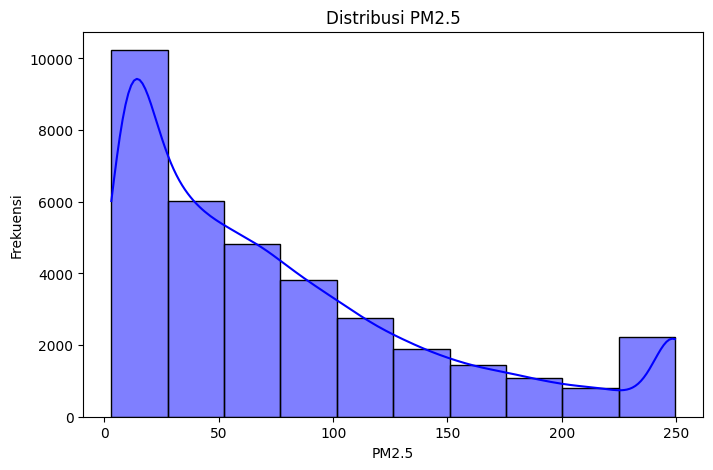

In [ ]:
# histogram untuk distribusi PM2.5
plt.figure(figsize=(8, 5))
sns.histplot(airq1_df["PM2.5"], bins=10, kde=True, color="blue")
plt.title("Distribusi PM2.5")
plt.xlabel("PM2.5")
plt.ylabel("Frekuensi")
plt.show()

**Insight**

- Distribusi PM2.5 terlihat right-skewed (condong ke kanan), menunjukkan bahwa sebagian besar nilai PM2.5 berada pada level rendah

- Sebagian besar frekuensi terdapat di kisaran 0 - 50, yang menunjukkan bahwa dalam kebanyakan waktu, tingkat PM2.5 relatif rendah.

- Terdapat peningkatan kecil pada nilai sekitar 250, yang bisa menunjukkan adanya kejadian polusi udara ekstrem.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren perkembangan rata-rata polusi dari bulan ke bulan dalam periode tahun 2013 sampai 2017?

In [ ]:
for year in range(2013, 2017+1):
    print(f"Bulan dengan kualitas udara terburuk di tahun {year} (berdasarkan Total Polutan):")
    print(monthly_avg[monthly_avg['year'] == year][['month', 'Total_Pollutants']].sort_values(by='Total_Pollutants', ascending=False).head())


Bulan dengan kualitas udara terburuk di tahun 2013 (berdasarkan Total Polutan):
   month  Total_Pollutants
9     12       1899.489607
3      6       1899.134117
0      3       1870.794161
8     11       1816.431148
7     10       1607.995445
Bulan dengan kualitas udara terburuk di tahun 2014 (berdasarkan Total Polutan):
    month  Total_Pollutants
11      2       2429.627504
10      1       2244.795152
20     11       1870.346549
12      3       1792.732772
19     10       1727.045713
Bulan dengan kualitas udara terburuk di tahun 2015 (berdasarkan Total Polutan):
    month  Total_Pollutants
33     12       2372.511795
22      1       2072.412248
32     11       2002.723472
23      2       1761.427149
24      3       1558.374600
Bulan dengan kualitas udara terburuk di tahun 2016 (berdasarkan Total Polutan):
    month  Total_Pollutants
45     12       2409.240655
44     11       2066.980764
34      1       1864.914229
36      3       1526.129878
43     10       1438.155788
Bulan dengan k

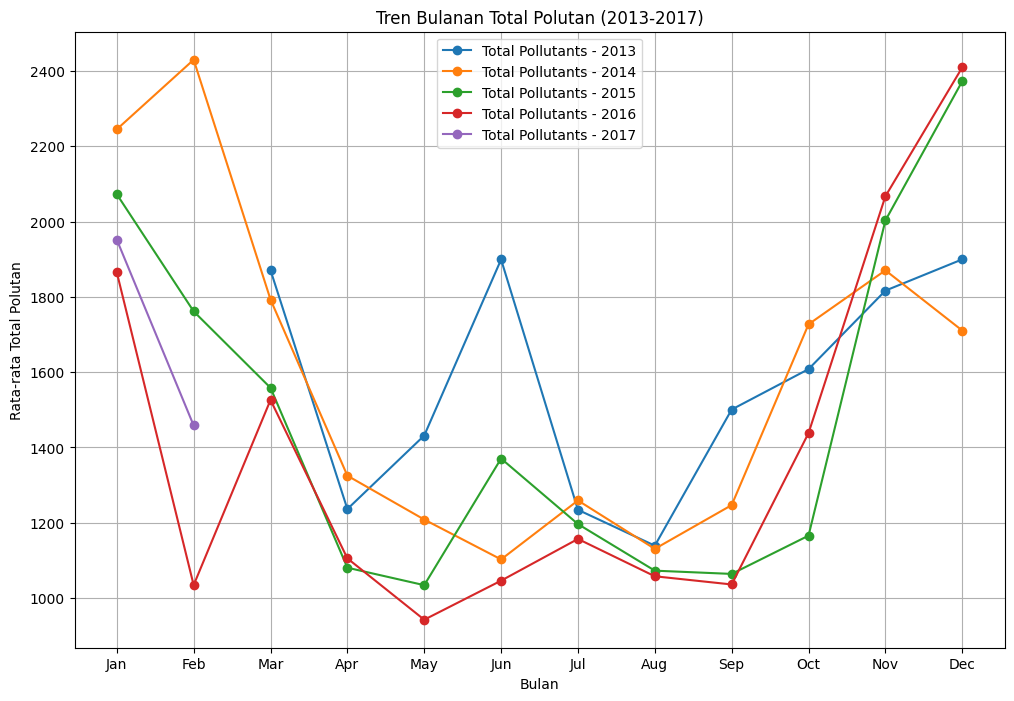

In [ ]:
plt.figure(figsize=(12, 8))
for year in range(2013, 2017 + 1):
    data_per_year = monthly_avg[monthly_avg['year'] == year]
    plt.plot(data_per_year['month'], data_per_year['Total_Pollutants'], marker='o', label=f'Total Pollutants - {year}')

plt.title('Tren Bulanan Total Polutan (2013-2017)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Total Polutan')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Menampilkan label bulan
plt.legend()
plt.grid(True)
plt.show()

**Insight :**
- jumlah total polutan cenderung tinggi pada awal tahun (Januari) dan akhir tahun (November-Desember).

- tren menurun terjadi pada bulan April hingga Juli, menunjukkan periode dengan tingkat polusi lebih rendah.

- terjadi lonjakan signifikan pada akhir tahun (Oktober-Desember) di hampir semua tahun yang dianalisis.

- tahun 2014 dan 2016 menunjukkan kenaikan drastis di bulan Januari, sedangkan tahun 2017 memiliki fluktuasi yang lebih stabil.

### Pertanyaan 2: Bagaimana hubungan antara kecepatan angin (WSPM) dan tingkat PM2.5 pada hari kerja dan akhir pekan di stasiun Wanliu dalam tahun 2016?

In [ ]:
df_filtered = airq2_df[airq2_df['year'] == 2016]
pm25_avg = df_filtered.groupby('day')['PM2.5'].mean().reset_index()

<ipython-input-38-82be8de0fcd3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['WSPM_category'] = pd.cut(df_filtered['WSPM'], bins=bins, labels=labels)
<ipython-input-38-82be8de0fcd3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_type'] = df_filtered['day'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')
<ipython-input-38-82be8de0fcd3>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=F

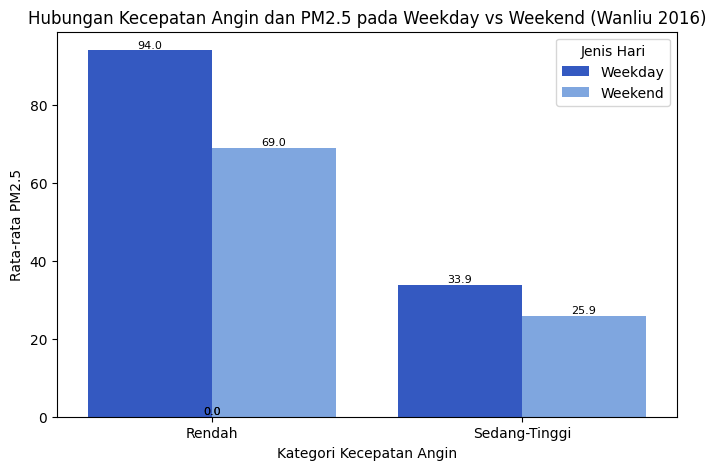

In [ ]:
# Kategorikan kecepatan angin (WSPM) menjadi 3 level
bins = sorted([0, 3, df_filtered['WSPM'].max()])
labels = ['Rendah', 'Sedang-Tinggi']
df_filtered['WSPM_category'] = pd.cut(df_filtered['WSPM'], bins=bins, labels=labels)

# Kategorikan hari sebagai Weekday atau Weekend
df_filtered['day_type'] = df_filtered['day'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Hitung rata-rata PM2.5 berdasarkan kategori WSPM dan jenis hari
pm25_avg = df_filtered.groupby(['WSPM_category', 'day_type'])['PM2.5'].mean().reset_index()

# Visualisasi dengan Bar Chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=pm25_avg, x='WSPM_category', y='PM2.5', hue='day_type', palette=['#1d4ed8', '#6fa3ef'])

# Tambahkan label nilai di atas batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black')

# Tambahkan judul dan label
plt.xlabel("Kategori Kecepatan Angin")
plt.ylabel("Rata-rata PM2.5")
plt.title("Hubungan Kecepatan Angin dan PM2.5 pada Weekday vs Weekend (Wanliu 2016)")
plt.legend(title='Jenis Hari')
plt.show()

**Insight:**
- Kategori kecepatan angin rendah =  pada hari weekday, rata rata PM2.5 jauh lebih tinggi (94.3), dibandingkan weekend (69.8), menunjukan bahwa ketika kecepatan angin rendah, polusi udara lebih tinggi.

- Kategori kecepatan angin sedang-tinggi = ketika kecepatan angin sedang - tinggi, rata rata PM2.5 menurun signifikan baik pada weekday (33.9) maupun weekend(25.8), menunjukan bahwa kecepatan angin yg lebih tinggi membantu mengurangi konsentrasi polutan di udara dengan menyebarkannya lebih jauh


## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan analisis data, jumlah polusi udara cenderung tinggi pada bulan Januari serta November–Desember, sementara tren penurunan terjadi pada bulan April hingga Juli, menunjukkan periode dengan tingkat polusi yang lebih rendah. Lonjakan signifikan juga terjadi pada bulan Oktober–Desember di hampir semua tahun, terutama tahun 2014 dan 2016 yang mengalami kenaikan drastis pada bulan Januari. Namun, tahun 2017 menunjukkan fluktuasi yang lebih stabil. Secara umum, pola ini mengindikasikan bahwa polusi udara lebih tinggi di musim dingin dan lebih rendah di musim panas. Perbedaan antar tahun dapat disebabkan oleh faktor eksternal seperti kondisi cuaca, kebijakan lingkungan, dan perubahan aktivitas manusia. Oleh karena itu, disarankan kepada pemerintah dan lembaga terkait untuk meningkatkan kebijakan pengendalian polusi udara, terutama pada musim dingin, dengan mengoptimalkan sistem pemantauan serta regulasi industri dan transportasi pada periode tersebut.



- Conclution pertanyaan 2 : Dari semua kategori kecepatan angin yang dianalisis, kadar PM2.5 cenderung lebih tinggi pada hari kerja dibandingkan akhir pekan, yang kemungkinan disebabkan oleh meningkatnya aktivitas manusia seperti transportasi, industri, dan pembakaran bahan bakar fosil. Aktivitas ini menghasilkan emisi polutan yang lebih besar, terutama di daerah perkotaan dan kawasan industri, sementara pada akhir pekan, penurunan aktivitas ini berkontribusi pada tingkat polusi yang lebih rendah. Selain itu, kecepatan angin memainkan peran penting dalam penyebaran polutan, di mana kondisi angin rendah membuat partikel polusi bertahan lebih lama di udara, meningkatkan konsentrasi PM2.5 terutama pada hari kerja. Oleh karena itu, diperlukan langkah-langkah konkret seperti penerapan kebijakan transportasi berkelanjutan, optimalisasi regulasi industri dengan standar emisi yang lebih ketat, serta pemantauan kualitas udara secara real-time untuk mengantisipasi lonjakan polusi. Selain itu, penghijauan di kawasan perkotaan dan industri dapat membantu menyaring polusi udara, sementara edukasi dan kampanye kesadaran lingkungan diharapkan dapat meningkatkan partisipasi masyarakat dalam menjaga kualitas udara. Dengan strategi ini, kadar PM2.5 yang tinggi pada hari kerja dapat ditekan, sehingga kualitas udara tetap terjaga dan dampak negatif terhadap kesehatan masyarakat dapat diminimalkan.

In [ ]:
airq2_df.to_csv("airquality_new.csv", index=False)